[INFO] Starting Chromium download.
100%|██████████| 183M/183M [00:17<00:00, 10.2Mb/s] 
[INFO] Beginning extraction
[INFO] Chromium extracted to: /home/ritik-maurya/snap/code/200/.local/share/pyppeteer/local-chromium/1181205


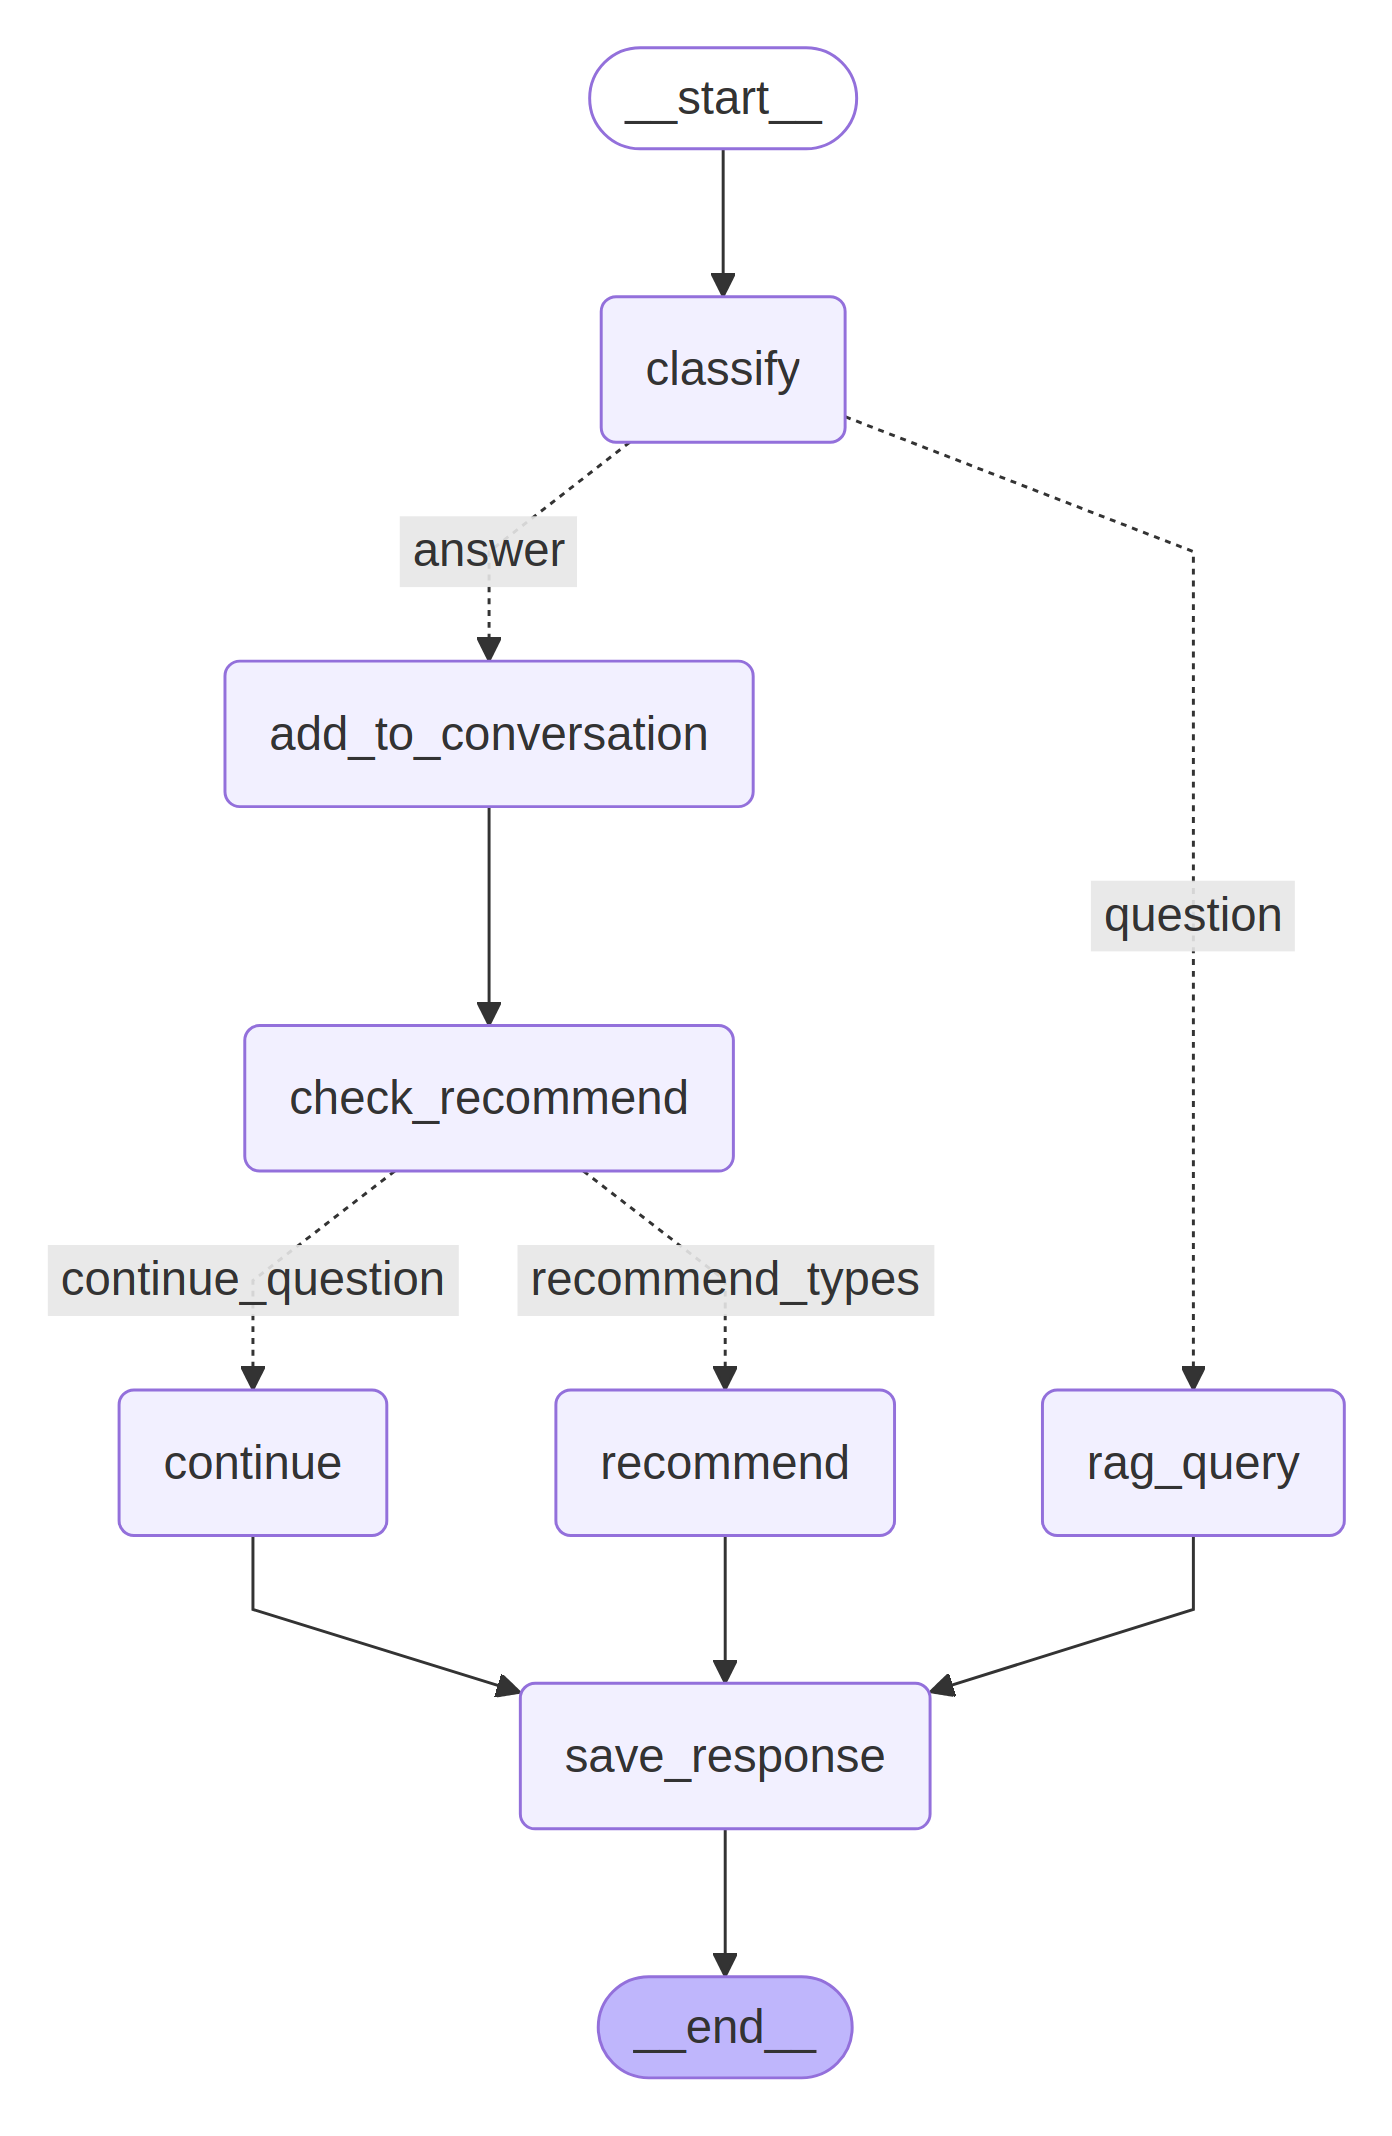

In [2]:
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages
from langchain_core.runnables import RunnableLambda, RunnableConfig
from typing import TypedDict, Annotated
import datetime
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
import nest_asyncio
nest_asyncio.apply()

from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated, Literal
from langchain_core.runnables import RunnableLambda, RunnableBranch

# 1. Define the shared state
class GraphState(TypedDict):
    messages: Annotated[list[dict], "Conversation history"]
    classification: Annotated[dict, "Classification result"]
    full_response: Annotated[str, "AI full response"]
    is_complete: Annotated[bool, "Conversation complete status"]
    using_rag: Annotated[bool, "Is RAG used"]

# 2. Nodes as LangChain Runnables or functions

# Node: Classify input
def classify_user_input(state: GraphState) -> dict:
    user_input = state["messages"][-1]["content"]
    # Call classifier (LangChain LLM)
    return {
        "type": "question" or "answer",
        "confidence": 0.9,
        "reasoning": "..."
    }

# Node: Generate RAG response
def generate_rag_response(state: GraphState) -> dict:
    # Use your EnhancedRAGFolderStructureDB
    return {"full_response": "RAG answer", "using_rag": True}

# Node: Add user message to history
def add_to_conversation(state: GraphState) -> dict:
    return state

# Node: Check if ready for recommendation
def check_trigger_conditions(state: GraphState) -> Literal["recommend", "continue"]:
    if len(state["messages"]) >= 4:
        return "recommend_types"
    return "continue_question"

# Node: Trigger structured recommendation
def generate_recommendation(state: GraphState) -> dict:
    return {"full_response": "🏆 personalized water heater type recommendations", "is_complete": True}

# Node: Continue conversation (follow-up question)
def continue_conversation(state: GraphState) -> dict:
    return {"full_response": "Follow-up question"}

# Node: Save assistant response
def save_response(state: GraphState) -> dict:
    return state

# 3. Build the graph
builder = StateGraph(GraphState)

builder.add_node("classify", RunnableLambda(classify_user_input))
builder.add_node("rag_query", RunnableLambda(generate_rag_response))
builder.add_node("add_to_conversation", RunnableLambda(add_to_conversation))
builder.add_node("check_recommend", RunnableLambda(check_trigger_conditions))
builder.add_node("recommend", RunnableLambda(generate_recommendation))
builder.add_node("continue", RunnableLambda(continue_conversation))
builder.add_node("save_response", RunnableLambda(save_response))

# 4. Edges & conditional routing
builder.set_entry_point("classify")

builder.add_conditional_edges("classify", lambda state: state["classification"]["type"], {
    "question": "rag_query",
    "answer": "add_to_conversation"
})

builder.add_edge("rag_query", "save_response")

builder.add_edge("add_to_conversation", "check_recommend")

builder.add_conditional_edges("check_recommend", lambda s: check_trigger_conditions(s), {
    "recommend_types": "recommend",
    "continue_question": "continue"
})

builder.add_edge("recommend", "save_response")
builder.add_edge("continue", "save_response")

builder.add_edge("save_response", END)

# 5. Compile
graph = builder.compile()



display(Image(graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER),width=400))

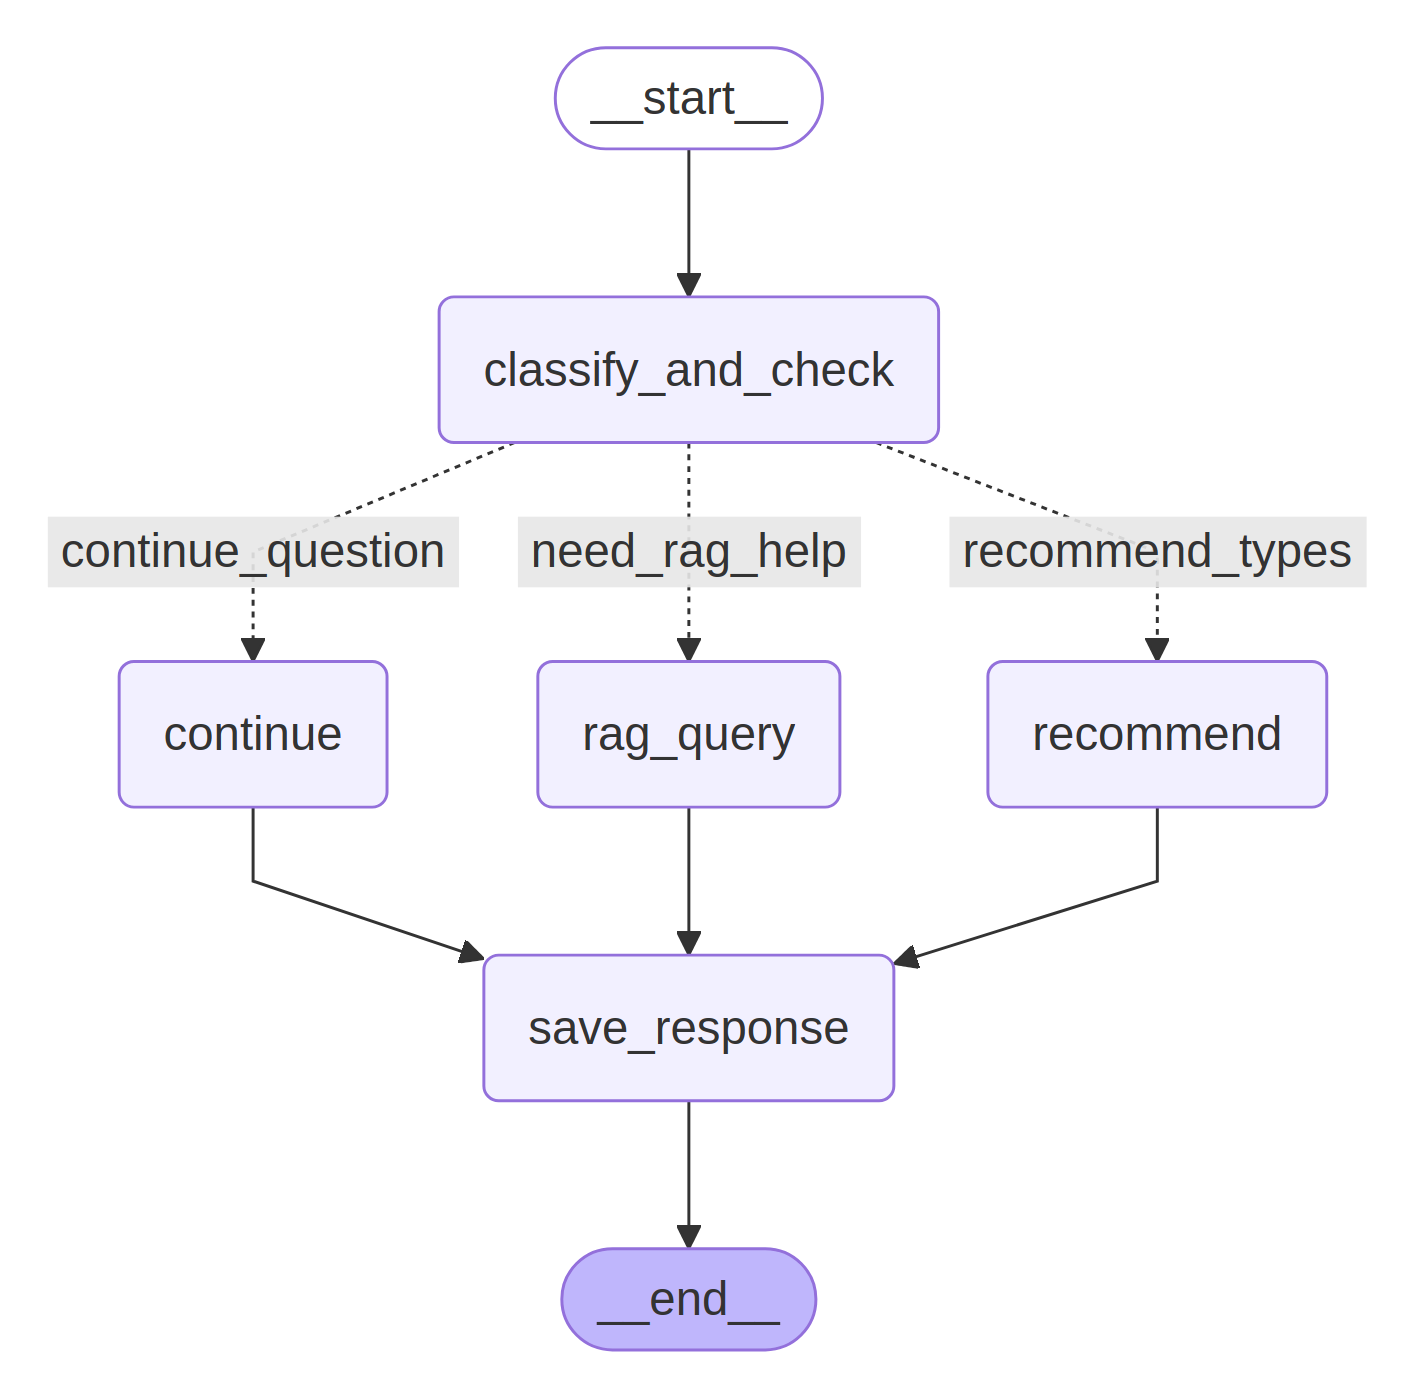

In [4]:
def classify_and_check_recommendation(state: GraphState):
    pass


builder = StateGraph(GraphState)
# Add nodes (combined node replaces classify, add_to_conversation, and check_recommend)
builder.add_node("classify_and_check", classify_and_check_recommendation)
builder.add_node("rag_query", generate_rag_response)
builder.add_node("recommend", generate_recommendation)
builder.add_node("continue", continue_conversation)
builder.add_node("save_response", save_response)

# Set entry point
builder.set_entry_point("classify_and_check")

# Add conditional edges from the combined node
builder.add_conditional_edges(
    "classify_and_check",
    lambda state: state.get("decision", "continue_question"),
    {
        "need_rag_help": "rag_query",
        "recommend_types": "recommend",
        "continue_question": "continue"
    }
)

# Add regular edges
builder.add_edge("rag_query", "save_response")
builder.add_edge("recommend", "save_response")
builder.add_edge("continue", "save_response")
builder.add_edge("save_response", END)

# Compile the graph
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER),width=400))

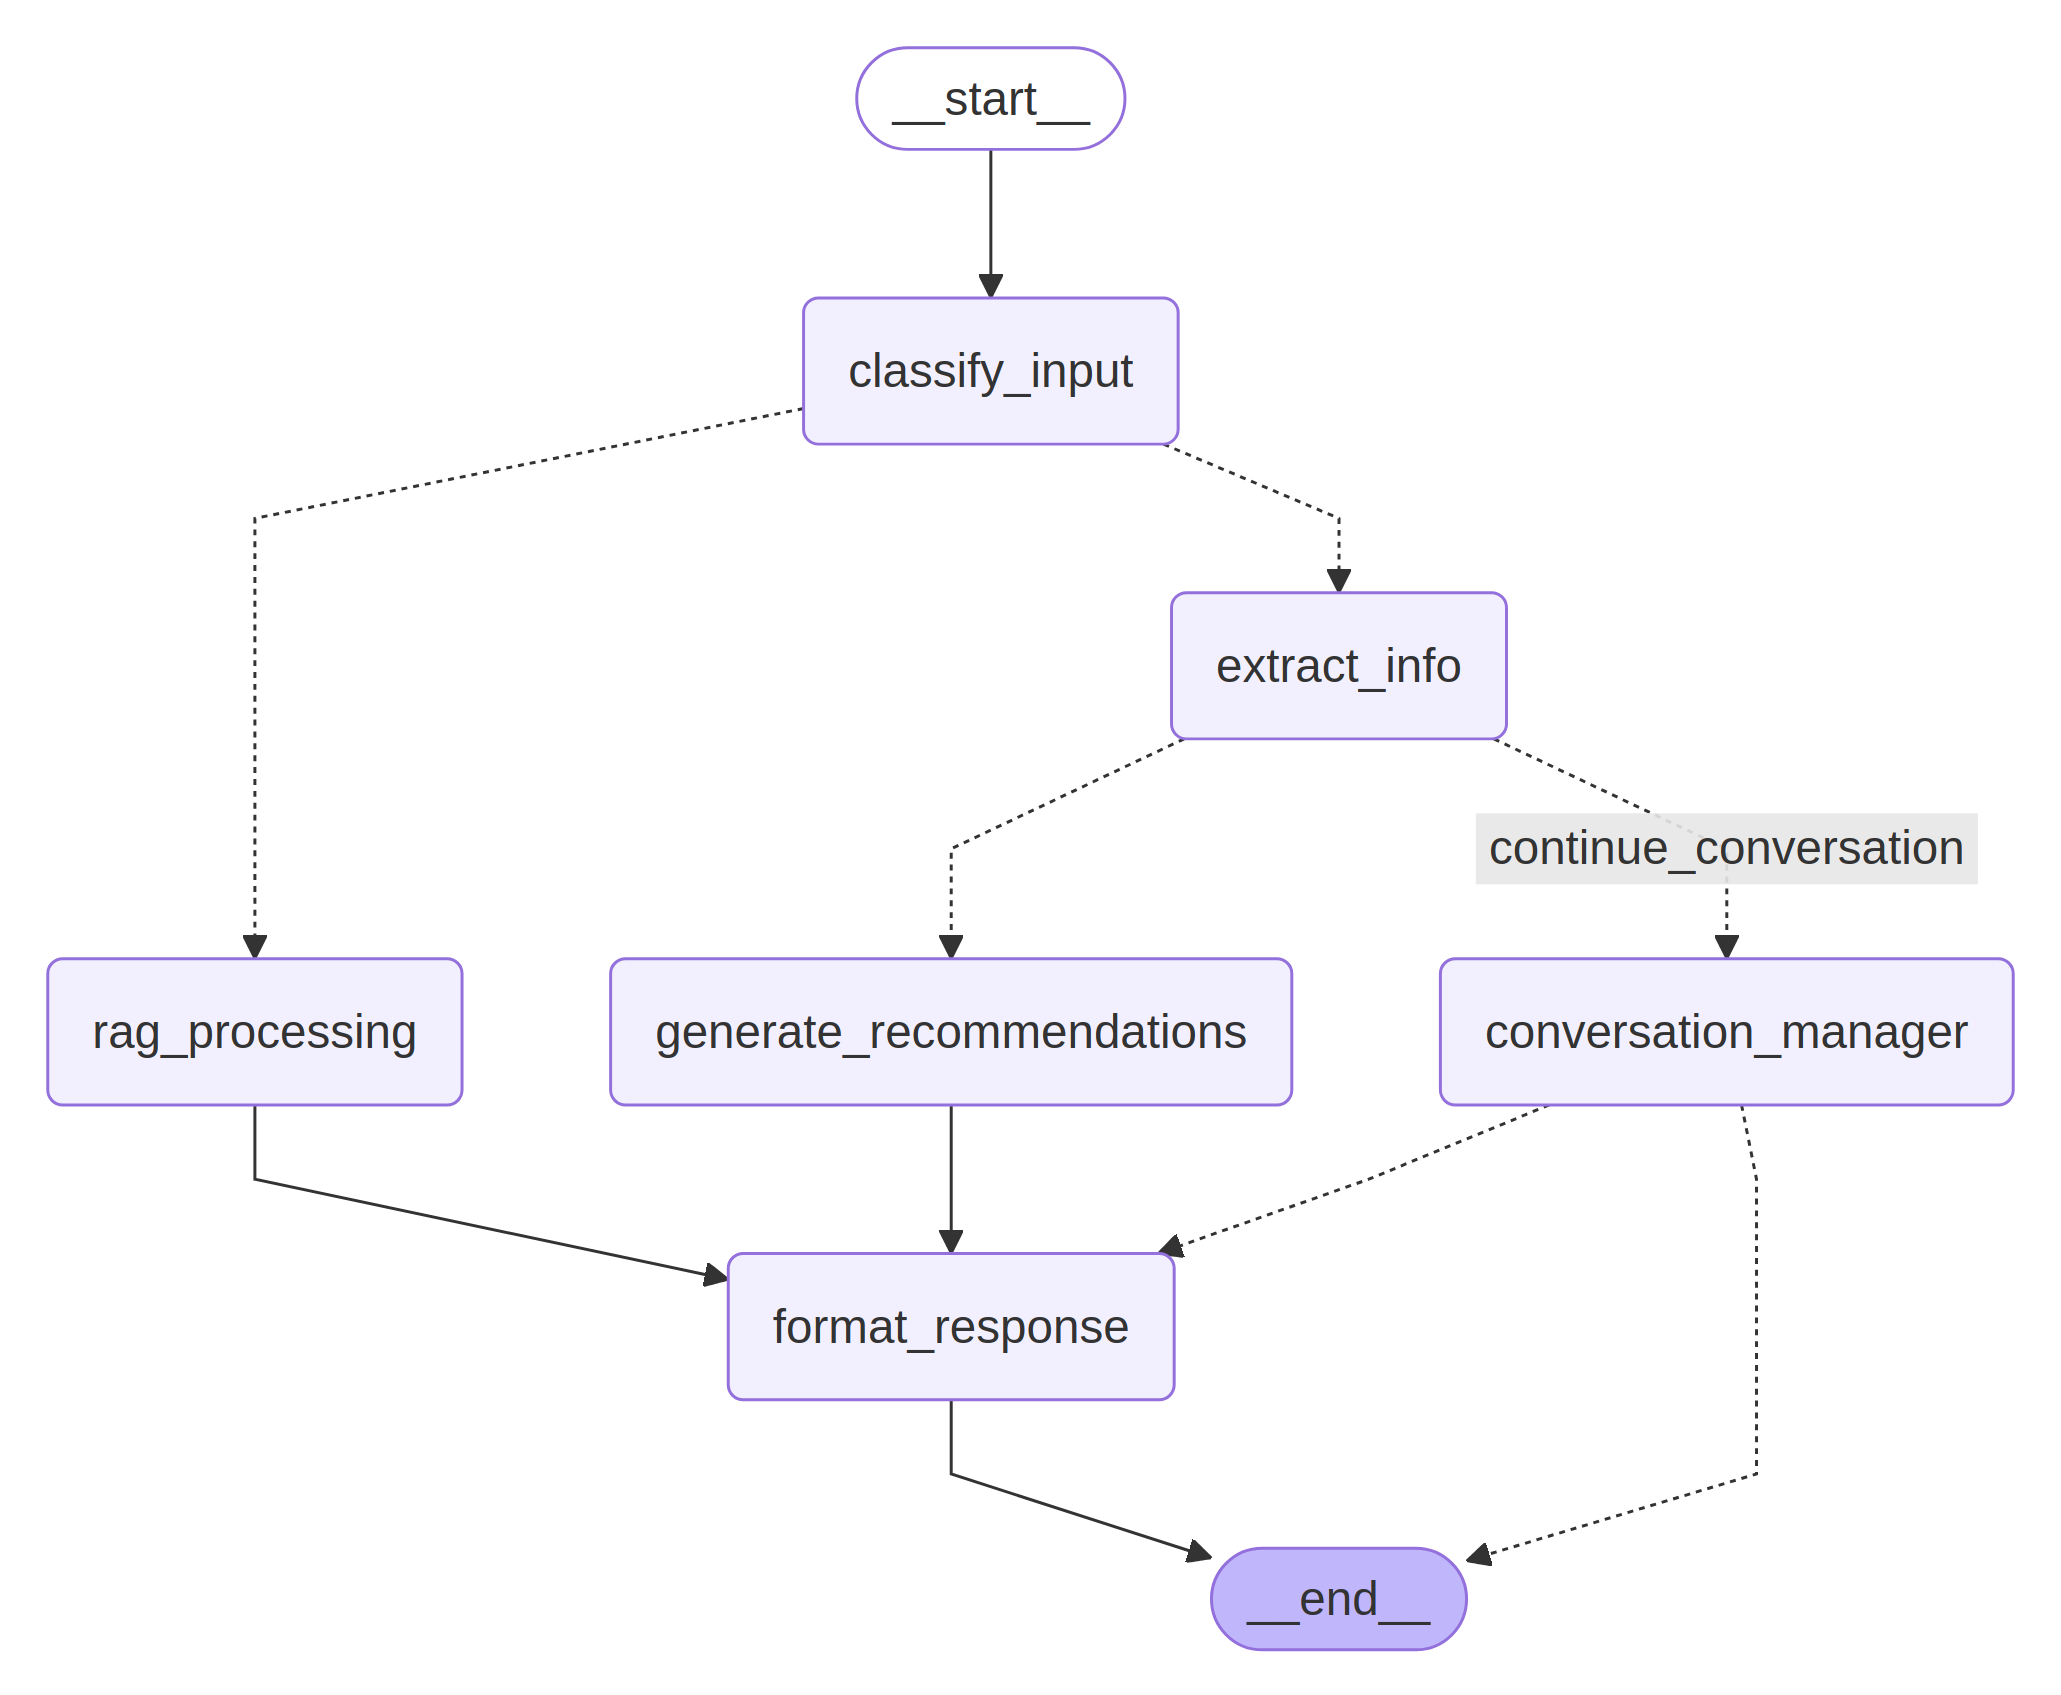

In [24]:
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages
from langchain_core.runnables import RunnableLambda, RunnableConfig
from typing import TypedDict, Annotated
import datetime
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
import nest_asyncio
nest_asyncio.apply()

from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated, Literal
from langchain_core.runnables import RunnableLambda, RunnableBranch


def _classify_input():
    pass
def _handle_question():
    pass
def _add_to_conversation():
    pass
def _check_recommendation_trigger():
    pass
def _generate_recommendation():
    pass
def _continue_conversation():
    pass
def _save_response():
    pass
def _route_by_classification():
    pass
def _route_by_recommendation_check():
    pass

class GraphState:
    pass

builder = StateGraph(GraphState)
        # Add nodes
builder.add_node("classify_input", _classify_input)
builder.add_node("handle_question", _handle_question)
builder.add_node("add_to_conversation", _add_to_conversation)
builder.add_node("check_recommendation_trigger", _check_recommendation_trigger)
builder.add_node("generate_recommendation", _generate_recommendation)
builder.add_node("continue_conversation", _continue_conversation)
builder.add_node("save_response", _save_response)

# Set entry point
builder.set_entry_point("classify_input")

# Add conditional edges
builder.add_conditional_edges(
    "classify_input",
    _route_by_classification,
    {
        "question": "handle_question",
        "answer": "add_to_conversation"
    }
)

builder.add_edge("handle_question", "save_response")
builder.add_edge("add_to_conversation", "check_recommendation_trigger")

builder.add_conditional_edges(
    "check_recommendation_trigger",
    _route_by_recommendation_check,
    {
        "recommend": "generate_recommendation",
        "continue": "continue_conversation"
    }
)

builder.add_edge("generate_recommendation", "save_response")
builder.add_edge("continue_conversation", "save_response")
builder.add_edge("save_response", END)

# Compile the graph
graph = builder.compile()

display(Image(g.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER),width=400))

In [2]:
import openai
from dotenv import load_dotenv
import os
load_dotenv()

openai.api_key = os.getenv("OPENAI_API_KEY")

models = openai.models.list()

for model in models.data:
    print(model.id)


gpt-4-0613
gpt-4
gpt-3.5-turbo
o4-mini-deep-research-2025-06-26
codex-mini-latest
gpt-4o-realtime-preview-2025-06-03
gpt-4o-audio-preview-2025-06-03
o4-mini-deep-research
davinci-002
babbage-002
gpt-3.5-turbo-instruct
gpt-3.5-turbo-instruct-0914
dall-e-3
dall-e-2
gpt-4-1106-preview
gpt-3.5-turbo-1106
tts-1-hd
tts-1-1106
tts-1-hd-1106
text-embedding-3-small
text-embedding-3-large
gpt-4-0125-preview
gpt-4-turbo-preview
gpt-3.5-turbo-0125
gpt-4-turbo
gpt-4-turbo-2024-04-09
gpt-4o
gpt-4o-2024-05-13
gpt-4o-mini-2024-07-18
gpt-4o-mini
gpt-4o-2024-08-06
chatgpt-4o-latest
o1-preview-2024-09-12
o1-preview
o1-mini-2024-09-12
o1-mini
gpt-4o-realtime-preview-2024-10-01
gpt-4o-audio-preview-2024-10-01
gpt-4o-audio-preview
gpt-4o-realtime-preview
omni-moderation-latest
omni-moderation-2024-09-26
gpt-4o-realtime-preview-2024-12-17
gpt-4o-audio-preview-2024-12-17
gpt-4o-mini-realtime-preview-2024-12-17
gpt-4o-mini-audio-preview-2024-12-17
o1-2024-12-17
o1
gpt-4o-mini-realtime-preview
gpt-4o-mini-audio

In [14]:
from openai import OpenAI
from dotenv import load_dotenv
import os
# Load environment variables from .env file
load_dotenv()
# Initialize OpenAI client with your API key
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": "tell me about java programming language in 20 words"}
    ],
    temperature=0,
    stream=True  # Enable streaming
)

# Process each chunk as it's received
streamed_text = ""
for chunk in response:
    delta = chunk.choices[0].delta.content
    if delta:
        print(delta, end="", flush=True)  # print as it streams
        streamed_text += delta

print("\n— Done!")  # end line after streaming finishes


Java is a versatile, object-oriented programming language known for its portability, security, and extensive libraries for various applications.
— Done!


In [7]:
with open('All_Context/all_sites_info_v2.txt', 'r') as file:
    txt = file.read()
# with open('All_Context/all_file_info_shorter.txt', 'r') as file:
    # txt = file.read()

len(txt.split())

5393

In [1]:
import json
from typing import Dict, List, Set, Optional
from dataclasses import dataclass
from enum import Enum

class QuestionType(Enum):
    INITIAL = "initial"
    FOLLOW_UP = "follow_up"
    TECHNICAL = "technical"
    DECISION = "decision"

@dataclass
class KnowledgeSection:
    path: str
    title: str
    category: str
    keywords: Set[str]
    prerequisites: List[str]
    related_sections: List[str]
    question_triggers: List[str]

@dataclass
class Question:
    id: str
    text: str
    question_type: QuestionType
    category: str
    expected_answers: List[str]
    next_questions: Dict[str, List[str]]  # answer -> list of next question IDs
    knowledge_sections: List[str]  # relevant knowledge section paths

class WaterHeaterKnowledgeIndex:
    def __init__(self):
        self.knowledge_sections = self._initialize_knowledge_sections()
        self.questions = self._initialize_questions()
        self.conversation_flow = self._initialize_conversation_flow()
    
    def _initialize_knowledge_sections(self) -> Dict[str, KnowledgeSection]:
        """Initialize the knowledge base section mapping"""
        sections = {
            # Main Categories
            "selecting_overview": KnowledgeSection(
                path="Selecting_a_New_Water_Heater/",
                title="Selecting a New Water Heater Overview",
                category="selection",
                keywords={"select", "choose", "new", "replacement", "buying"},
                prerequisites=[],
                related_sections=["types", "criteria", "fuel_types"],
                question_triggers=["need new water heater", "choosing water heater", "replacement"]
            ),
            
            "types": KnowledgeSection(
                path="Selecting_a_New_Water_Heater/Types_of_Water_Heaters.txt",
                title="Types of Water Heaters",
                category="types",
                keywords={"conventional", "tankless", "heat pump", "solar", "types"},
                prerequisites=[],
                related_sections=["storage", "tankless", "heat_pump", "solar"],
                question_triggers=["what types", "different kinds", "options available"]
            ),
            
            "criteria": KnowledgeSection(
                path="Selecting_a_New_Water_Heater/Selection_Criteria.txt",
                title="Selection Criteria",
                category="selection",
                keywords={"criteria", "factors", "consider", "size", "efficiency", "cost"},
                prerequisites=["types"],
                related_sections=["sizing", "efficiency", "costs"],
                question_triggers=["how to choose", "what to consider", "selection factors"]
            ),
            
            # Storage Water Heaters
            "storage": KnowledgeSection(
                path="Storage_Water_Heaters/How_They_Work.txt",
                title="Storage Water Heaters - How They Work",
                category="storage",
                keywords={"storage", "tank", "conventional", "reservoir", "gallons"},
                prerequisites=["types"],
                related_sections=["storage_select", "storage_install"],
                question_triggers=["how storage work", "tank water heater", "conventional"]
            ),
            
            "storage_select": KnowledgeSection(
                path="Storage_Water_Heaters/Selecting_a_Storage_Water_Heater.txt",
                title="Selecting Storage Water Heaters",
                category="storage",
                keywords={"select", "storage", "size", "first hour rating"},
                prerequisites=["storage"],
                related_sections=["sizing_storage", "efficiency"],
                question_triggers=["choose storage", "tank size", "which storage"]
            ),
            
            # Tankless Water Heaters
            "tankless": KnowledgeSection(
                path="Tankless_or_Demand_Type_Water_Heaters/How_Tankless_Water_Heaters_Work.txt",
                title="How Tankless Water Heaters Work",
                category="tankless",
                keywords={"tankless", "demand", "instantaneous", "on-demand", "flow rate"},
                prerequisites=["types"],
                related_sections=["tankless_advantages", "tankless_select"],
                question_triggers=["how tankless work", "on demand", "instantaneous"]
            ),
            
            "tankless_advantages": KnowledgeSection(
                path="Tankless_or_Demand_Type_Water_Heaters/Advantages_and_Disadvantages_of_Tankless_Water_Heaters.txt",
                title="Tankless Advantages and Disadvantages",
                category="tankless",
                keywords={"advantages", "disadvantages", "pros", "cons", "benefits", "drawbacks"},
                prerequisites=["tankless"],
                related_sections=["efficiency", "costs"],
                question_triggers=["tankless benefits", "pros cons", "advantages"]
            ),
            
            # Heat Pump Water Heaters
            "heat_pump": KnowledgeSection(
                path="Heat_Pump_Water_Heaters/How_Heat_Pump_Water_Heaters_Work.txt",
                title="How Heat Pump Water Heaters Work",
                category="heat_pump",
                keywords={"heat pump", "electric", "efficient", "move heat", "refrigerator"},
                prerequisites=["types"],
                related_sections=["heat_pump_select", "efficiency"],
                question_triggers=["heat pump work", "most efficient", "electric efficient"]
            ),
            
            "heat_pump_select": KnowledgeSection(
                path="Heat_Pump_Water_Heaters/Selecting_a_Heat_Pump_Water_Heater.txt",
                title="Selecting Heat Pump Water Heaters",
                category="heat_pump",
                keywords={"select", "heat pump", "hybrid", "location", "space"},
                prerequisites=["heat_pump"],
                related_sections=["sizing_heat_pump", "installation"],
                question_triggers=["choose heat pump", "hybrid", "heat pump selection"]
            ),
            
            # Solar Water Heaters
            "solar": KnowledgeSection(
                path="Solar_Water_Heaters/How_They_Work.txt",
                title="How Solar Water Heaters Work",
                category="solar",
                keywords={"solar", "sun", "renewable", "active", "passive", "collectors"},
                prerequisites=["types"],
                related_sections=["solar_active", "solar_passive", "solar_select"],
                question_triggers=["solar work", "sun heating", "renewable"]
            ),
            
            "solar_active": KnowledgeSection(
                path="Solar_Water_Heaters/Active_Solar_Water_Heating_Systems.txt",
                title="Active Solar Systems",
                category="solar",
                keywords={"active", "pumps", "controls", "circulation", "direct", "indirect"},
                prerequisites=["solar"],
                related_sections=["solar_passive", "solar_collectors"],
                question_triggers=["active solar", "pumps", "circulation"]
            ),
            
            # Sizing
            "sizing_storage": KnowledgeSection(
                path="Sizing_a_New_Water_Heater/Sizing_Storage_and_Heat_Pump_with_Tank_Water_Heaters.txt",
                title="Sizing Storage and Heat Pump Water Heaters",
                category="sizing",
                keywords={"sizing", "size", "gallons", "first hour rating", "demand"},
                prerequisites=["storage", "heat_pump"],
                related_sections=["efficiency", "costs"],
                question_triggers=["what size", "how big", "tank size", "gallons"]
            ),
            
            "sizing_tankless": KnowledgeSection(
                path="Sizing_a_New_Water_Heater/Sizing_Tankless_or_Demand_Type_Water_Heaters.txt",
                title="Sizing Tankless Water Heaters",
                category="sizing",
                keywords={"sizing", "tankless", "flow rate", "GPM", "simultaneous"},
                prerequisites=["tankless"],
                related_sections=["tankless_advantages"],
                question_triggers=["tankless size", "flow rate", "GPM", "multiple uses"]
            ),
            
            # Efficiency and Costs
            "efficiency": KnowledgeSection(
                path="Estimating_Costs_and_Efficiency_of_Storage_Demand_and_Heat_Pump_Water_Heaters/Estimating_Costs_and_Efficiency_of_Storage_Demand_and_Heat_Pump_Water_Heaters.txt",
                title="Energy Efficiency and Operating Costs",
                category="efficiency",
                keywords={"efficiency", "UEF", "energy factor", "operating costs", "energy guide"},
                prerequisites=["types"],
                related_sections=["fuel_costs"],
                question_triggers=["efficiency", "operating costs", "energy bills", "savings"]
            ),
            
            # Fuel Types
            "fuel_types": KnowledgeSection(
                path="Selecting_a_New_Water_Heater/Fuel_Types_Availability_and_Costs_for_Water_Heating.txt",
                title="Fuel Types and Availability",
                category="fuel",
                keywords={"fuel", "gas", "electric", "propane", "oil", "solar", "availability"},
                prerequisites=[],
                related_sections=["fuel_costs"],
                question_triggers=["fuel options", "gas vs electric", "what fuel", "energy source"]
            ),
            
            "fuel_costs": KnowledgeSection(
                path="Selecting_a_New_Water_Heater/Comparing_Fuel_Costs_and_Water_Heater_Types.txt",
                title="Comparing Fuel Costs",
                category="fuel",
                keywords={"compare", "costs", "fuel costs", "rates", "utility"},
                prerequisites=["fuel_types"],
                related_sections=["efficiency"],
                question_triggers=["fuel costs", "compare costs", "cheapest fuel", "utility rates"]
            )
        }
        return sections
    
    def _initialize_questions(self) -> Dict[str, Question]:
        """Initialize the question database"""
        questions = {
            "q1": Question(
                id="q1",
                text="Are you looking to replace an existing water heater or install a new one?",
                question_type=QuestionType.INITIAL,
                category="general",
                expected_answers=["replace", "new", "existing", "install"],
                next_questions={
                    "replace": ["q2", "q3"],
                    "new": ["q4", "q5"],
                    "install": ["q4", "q5"]
                },
                knowledge_sections=["selecting_overview"]
            ),
            
            "q2": Question(
                id="q2",
                text="What type of water heater are you currently replacing?",
                question_type=QuestionType.FOLLOW_UP,
                category="replacement",
                expected_answers=["storage", "tankless", "heat pump", "solar", "conventional", "tank"],
                next_questions={
                    "storage": ["q6", "q7"],
                    "tankless": ["q8", "q9"],
                    "heat pump": ["q10"],
                    "solar": ["q11"],
                    "conventional": ["q6", "q7"],
                    "tank": ["q6", "q7"]
                },
                knowledge_sections=["types", "selecting_overview"]
            ),
            
            "q3": Question(
                id="q3",
                text="Are you satisfied with your current water heater's performance, or are you looking to address specific issues?",
                question_type=QuestionType.FOLLOW_UP,
                category="replacement",
                expected_answers=["satisfied", "issues", "problems", "upgrade", "efficiency"],
                next_questions={
                    "satisfied": ["q12"],
                    "issues": ["q13", "q14"],
                    "problems": ["q13", "q14"],
                    "upgrade": ["q15", "q16"],
                    "efficiency": ["q17"]
                },
                knowledge_sections=["criteria", "efficiency"]
            ),
            
            "q4": Question(
                id="q4",
                text="What's your primary goal: lowest upfront cost, highest energy efficiency, or best long-term value?",
                question_type=QuestionType.DECISION,
                category="priorities",
                expected_answers=["upfront cost", "efficiency", "long-term", "value", "cheap", "efficient"],
                next_questions={
                    "upfront cost": ["q18"],
                    "efficiency": ["q19", "q20"],
                    "long-term": ["q21"],
                    "value": ["q21"],
                    "cheap": ["q18"],
                    "efficient": ["q19", "q20"]
                },
                knowledge_sections=["criteria", "efficiency", "fuel_costs"]
            ),
            
            "q5": Question(
                id="q5",
                text="How many people live in your household and what's your typical hot water usage pattern?",
                question_type=QuestionType.TECHNICAL,
                category="sizing",
                expected_answers=["1-2", "3-4", "5+", "light", "moderate", "heavy", "morning", "evening"],
                next_questions={
                    "1-2": ["q22", "q23"],
                    "3-4": ["q24", "q25"],
                    "5+": ["q26"],
                    "light": ["q22"],
                    "moderate": ["q24"],
                    "heavy": ["q26"]
                },
                knowledge_sections=["sizing_storage", "sizing_tankless"]
            ),
            
            # Continue with more specific questions...
            "q6": Question(
                id="q6",
                text="Are you interested in exploring more energy-efficient alternatives to conventional storage water heaters?",
                question_type=QuestionType.FOLLOW_UP,
                category="alternatives",
                expected_answers=["yes", "no", "maybe", "interested", "alternatives"],
                next_questions={
                    "yes": ["q19", "q20"],
                    "interested": ["q19", "q20"],
                    "maybe": ["q27"],
                    "no": ["q28"]
                },
                knowledge_sections=["types", "heat_pump", "solar", "tankless"]
            ),
            
            "q19": Question(
                id="q19",
                text="Are you interested in heat pump water heaters? They're 2-3 times more efficient than conventional electric units.",
                question_type=QuestionType.TECHNICAL,
                category="heat_pump",
                expected_answers=["yes", "interested", "tell me more", "no", "concerns"],
                next_questions={
                    "yes": ["q29", "q30"],
                    "interested": ["q29", "q30"],
                    "tell me more": ["q29", "q30"],
                    "no": ["q31"],
                    "concerns": ["q32"]
                },
                knowledge_sections=["heat_pump", "heat_pump_select"]
            ),
            
            "q20": Question(
                id="q20",
                text="Would you consider solar water heating if it's viable in your area?",
                question_type=QuestionType.TECHNICAL,
                category="solar",
                expected_answers=["yes", "interested", "no", "depends", "cost"],
                next_questions={
                    "yes": ["q33", "q34"],
                    "interested": ["q33", "q34"],
                    "depends": ["q35"],
                    "cost": ["q36"],
                    "no": ["q37"]
                },
                knowledge_sections=["solar", "solar_active", "solar_passive"]
            )
        }
        return questions
    
    def _initialize_conversation_flow(self) -> Dict[str, List[str]]:
        """Initialize conversation flow patterns"""
        return {
            "entry_points": ["q1"],
            "high_efficiency_path": ["q19", "q20", "q17"],
            "budget_conscious_path": ["q18", "q28"],
            "sizing_focused_path": ["q5", "q22", "q24", "q26"],
            "replacement_path": ["q2", "q3", "q6"]
        }
    
    def get_initial_question(self) -> Question:
        """Get the initial question to start the conversation"""
        return self.questions["q1"]
    
    def get_relevant_knowledge_sections(self, question_id: str, user_answer: str) -> List[KnowledgeSection]:
        """Get relevant knowledge sections based on question and answer"""
        if question_id not in self.questions:
            return []
        
        question = self.questions[question_id]
        sections = []
        
        # Get sections directly linked to the question
        for section_id in question.knowledge_sections:
            if section_id in self.knowledge_sections:
                sections.append(self.knowledge_sections[section_id])
        
        # Find additional sections based on answer keywords
        answer_lower = user_answer.lower()
        for section in self.knowledge_sections.values():
            if any(keyword in answer_lower for keyword in section.keywords):
                if section not in sections:
                    sections.append(section)
        
        return sections
    
    def get_next_questions(self, question_id: str, user_answer: str) -> List[Question]:
        """Get next questions based on current question and user answer"""
        if question_id not in self.questions:
            return []
        
        current_question = self.questions[question_id]
        answer_lower = user_answer.lower()
        
        # Find matching answer patterns
        next_question_ids = []
        for answer_pattern, question_ids in current_question.next_questions.items():
            if answer_pattern.lower() in answer_lower:
                next_question_ids.extend(question_ids)
                break
        
        # If no specific match, use general follow-up logic
        if not next_question_ids:
            next_question_ids = self._get_fallback_questions(current_question, user_answer)
        
        return [self.questions[qid] for qid in next_question_ids if qid in self.questions]
    
    def _get_fallback_questions(self, current_question: Question, user_answer: str) -> List[str]:
        """Get fallback questions when no specific pattern matches"""
        answer_lower = user_answer.lower()
        
        # Keyword-based fallback logic
        if any(word in answer_lower for word in ["efficient", "save", "energy"]):
            return ["q19", "q20", "q17"]
        elif any(word in answer_lower for word in ["cheap", "budget", "cost"]):
            return ["q18"]
        elif any(word in answer_lower for word in ["size", "big", "small", "gallons"]):
            return ["q5"]
        else:
            return ["q4"]  # Default to priorities question
    
    def suggest_knowledge_priority(self, conversation_history: List[tuple]) -> List[str]:
        """Suggest priority knowledge sections based on conversation history"""
        # conversation_history: List of (question_id, user_answer) tuples
        
        mentioned_keywords = set()
        categories_discussed = set()
        
        for question_id, answer in conversation_history:
            if question_id in self.questions:
                question = self.questions[question_id]
                categories_discussed.add(question.category)
                mentioned_keywords.update(answer.lower().split())
        
        # Prioritize sections based on conversation context
        priority_sections = []
        
        # High priority: sections matching discussed categories
        for section in self.knowledge_sections.values():
            if section.category in categories_discussed:
                priority_sections.append(section.path)
        
        # Medium priority: sections with keyword matches
        for section in self.knowledge_sections.values():
            if section.keywords.intersection(mentioned_keywords) and section.path not in priority_sections:
                priority_sections.append(section.path)
        
        return priority_sections[:5]  # Return top 5 priority sections
    
    def export_index(self, filename: str = "water_heater_kb_index.json"):
        """Export the knowledge index to JSON file"""
        export_data = {
            "knowledge_sections": {
                k: {
                    "path": v.path,
                    "title": v.title,
                    "category": v.category,
                    "keywords": list(v.keywords),
                    "prerequisites": v.prerequisites,
                    "related_sections": v.related_sections,
                    "question_triggers": v.question_triggers
                } for k, v in self.knowledge_sections.items()
            },
            "questions": {
                k: {
                    "id": v.id,
                    "text": v.text,
                    "question_type": v.question_type.value,
                    "category": v.category,
                    "expected_answers": v.expected_answers,
                    "next_questions": v.next_questions,
                    "knowledge_sections": v.knowledge_sections
                } for k, v in self.questions.items()
            },
            "conversation_flow": self.conversation_flow
        }
        
        with open(filename, 'w') as f:
            json.dump(export_data, f, indent=2)
        
        return f"Index exported to {filename}"

# Example usage
if __name__ == "__main__":
    # Initialize the knowledge index
    kb_index = WaterHeaterKnowledgeIndex()
    
    # Start a conversation
    print("=== Water Heater Knowledge Base Assistant ===\n")
    
    # Get initial question
    current_question = kb_index.get_initial_question()
    conversation_history = []
    
    print(f"Q: {current_question.text}")
    user_answer = input("A: ")
    
    # Process the answer
    conversation_history.append((current_question.id, user_answer))
    
    # Get relevant knowledge sections
    relevant_sections = kb_index.get_relevant_knowledge_sections(current_question.id, user_answer)
    print(f"\n📚 Recommended knowledge sections:")
    for section in relevant_sections[:3]:
        print(f"  - {section.title} ({section.path})")
    
    # Get next questions
    next_questions = kb_index.get_next_questions(current_question.id, user_answer)
    print(f"\n❓ Suggested next questions:")
    for i, question in enumerate(next_questions[:2], 1):
        print(f"  {i}. {question.text}")
    
    # Show priority sections based on conversation
    priority_sections = kb_index.suggest_knowledge_priority(conversation_history)
    print(f"\n🎯 Priority knowledge sections:")
    for i, section_path in enumerate(priority_sections[:3], 1):
        print(f"  {i}. {section_path}")
    
    # Export the index
    export_result = kb_index.export_index()
    print(f"\n💾 {export_result}")

=== Water Heater Knowledge Base Assistant ===

Q: Are you looking to replace an existing water heater or install a new one?

📚 Recommended knowledge sections:
  - Selecting a New Water Heater Overview (Selecting_a_New_Water_Heater/)

❓ Suggested next questions:
  1. What's your primary goal: lowest upfront cost, highest energy efficiency, or best long-term value?

🎯 Priority knowledge sections:

💾 Index exported to water_heater_kb_index.json


In [2]:
import requests
from bs4 import BeautifulSoup

# List of URLs to scrape
urls = [
    "https://www.energy.gov/energysaver/selecting-new-water-heater",
    "https://www.energy.gov/energysaver/storage-water-heaters",
    "https://www.energy.gov/energysaver/tankless-or-demand-type-water-heaters",
    "https://www.energy.gov/energysaver/heat-pump-water-heaters",
    "https://www.energy.gov/energysaver/solar-water-heaters",
    "https://www.energy.gov/energysaver/tankless-coil-and-indirect-water-heaters",
    "https://www.energy.gov/energysaver/estimating-costs-and-efficiency-storage-demand-and-heat-pump-water-heaters"
]

def fetch_content(url):
    headers = {
        "User-Agent": "Mozilla/5.0"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")

        # Try to locate the main content area
        content = soup.find("main") or soup.find("article") or soup.find("div", {"id": "content"})

        if content:
            text = content.get_text(separator="\n", strip=True)
            return text
        else:
            return "Content not found."
    else:
        return f"Failed to fetch {url} (status code: {response.status_code})"

# Combine all content
combined_content = ""

for i, url in enumerate(urls, start=1):
    print(f"Fetching content from URL {i}: {url}")
    page_content = fetch_content(url)
    combined_content += f"\n\n=== Page {i}: {url} ===\n\n"
    combined_content += page_content

# Save to a single file
with open("all_water_heater_info.txt", "w", encoding="utf-8") as f:
    f.write(combined_content)

print("✅ Combined content saved to 'all_water_heater_info.txt'")


Fetching content from URL 1: https://www.energy.gov/energysaver/selecting-new-water-heater
Fetching content from URL 2: https://www.energy.gov/energysaver/storage-water-heaters
Fetching content from URL 3: https://www.energy.gov/energysaver/tankless-or-demand-type-water-heaters
Fetching content from URL 4: https://www.energy.gov/energysaver/heat-pump-water-heaters
Fetching content from URL 5: https://www.energy.gov/energysaver/solar-water-heaters
Fetching content from URL 6: https://www.energy.gov/energysaver/tankless-coil-and-indirect-water-heaters
Fetching content from URL 7: https://www.energy.gov/energysaver/estimating-costs-and-efficiency-storage-demand-and-heat-pump-water-heaters
✅ Combined content saved to 'all_water_heater_info.txt'


In [2]:
import os

base_dir = '/home/ritik/Documents/VScode/Softmaxai/Frank_Solar_Project/Knowledge_Base'
output_file = os.path.join(base_dir, 'all_texts_combined.txt')

with open(output_file, 'w', encoding='utf-8') as outfile:
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as infile:
                    outfile.write(f'--- {file_path} ---\n')
                    outfile.write(infile.read())
                    outfile.write('\n\n')

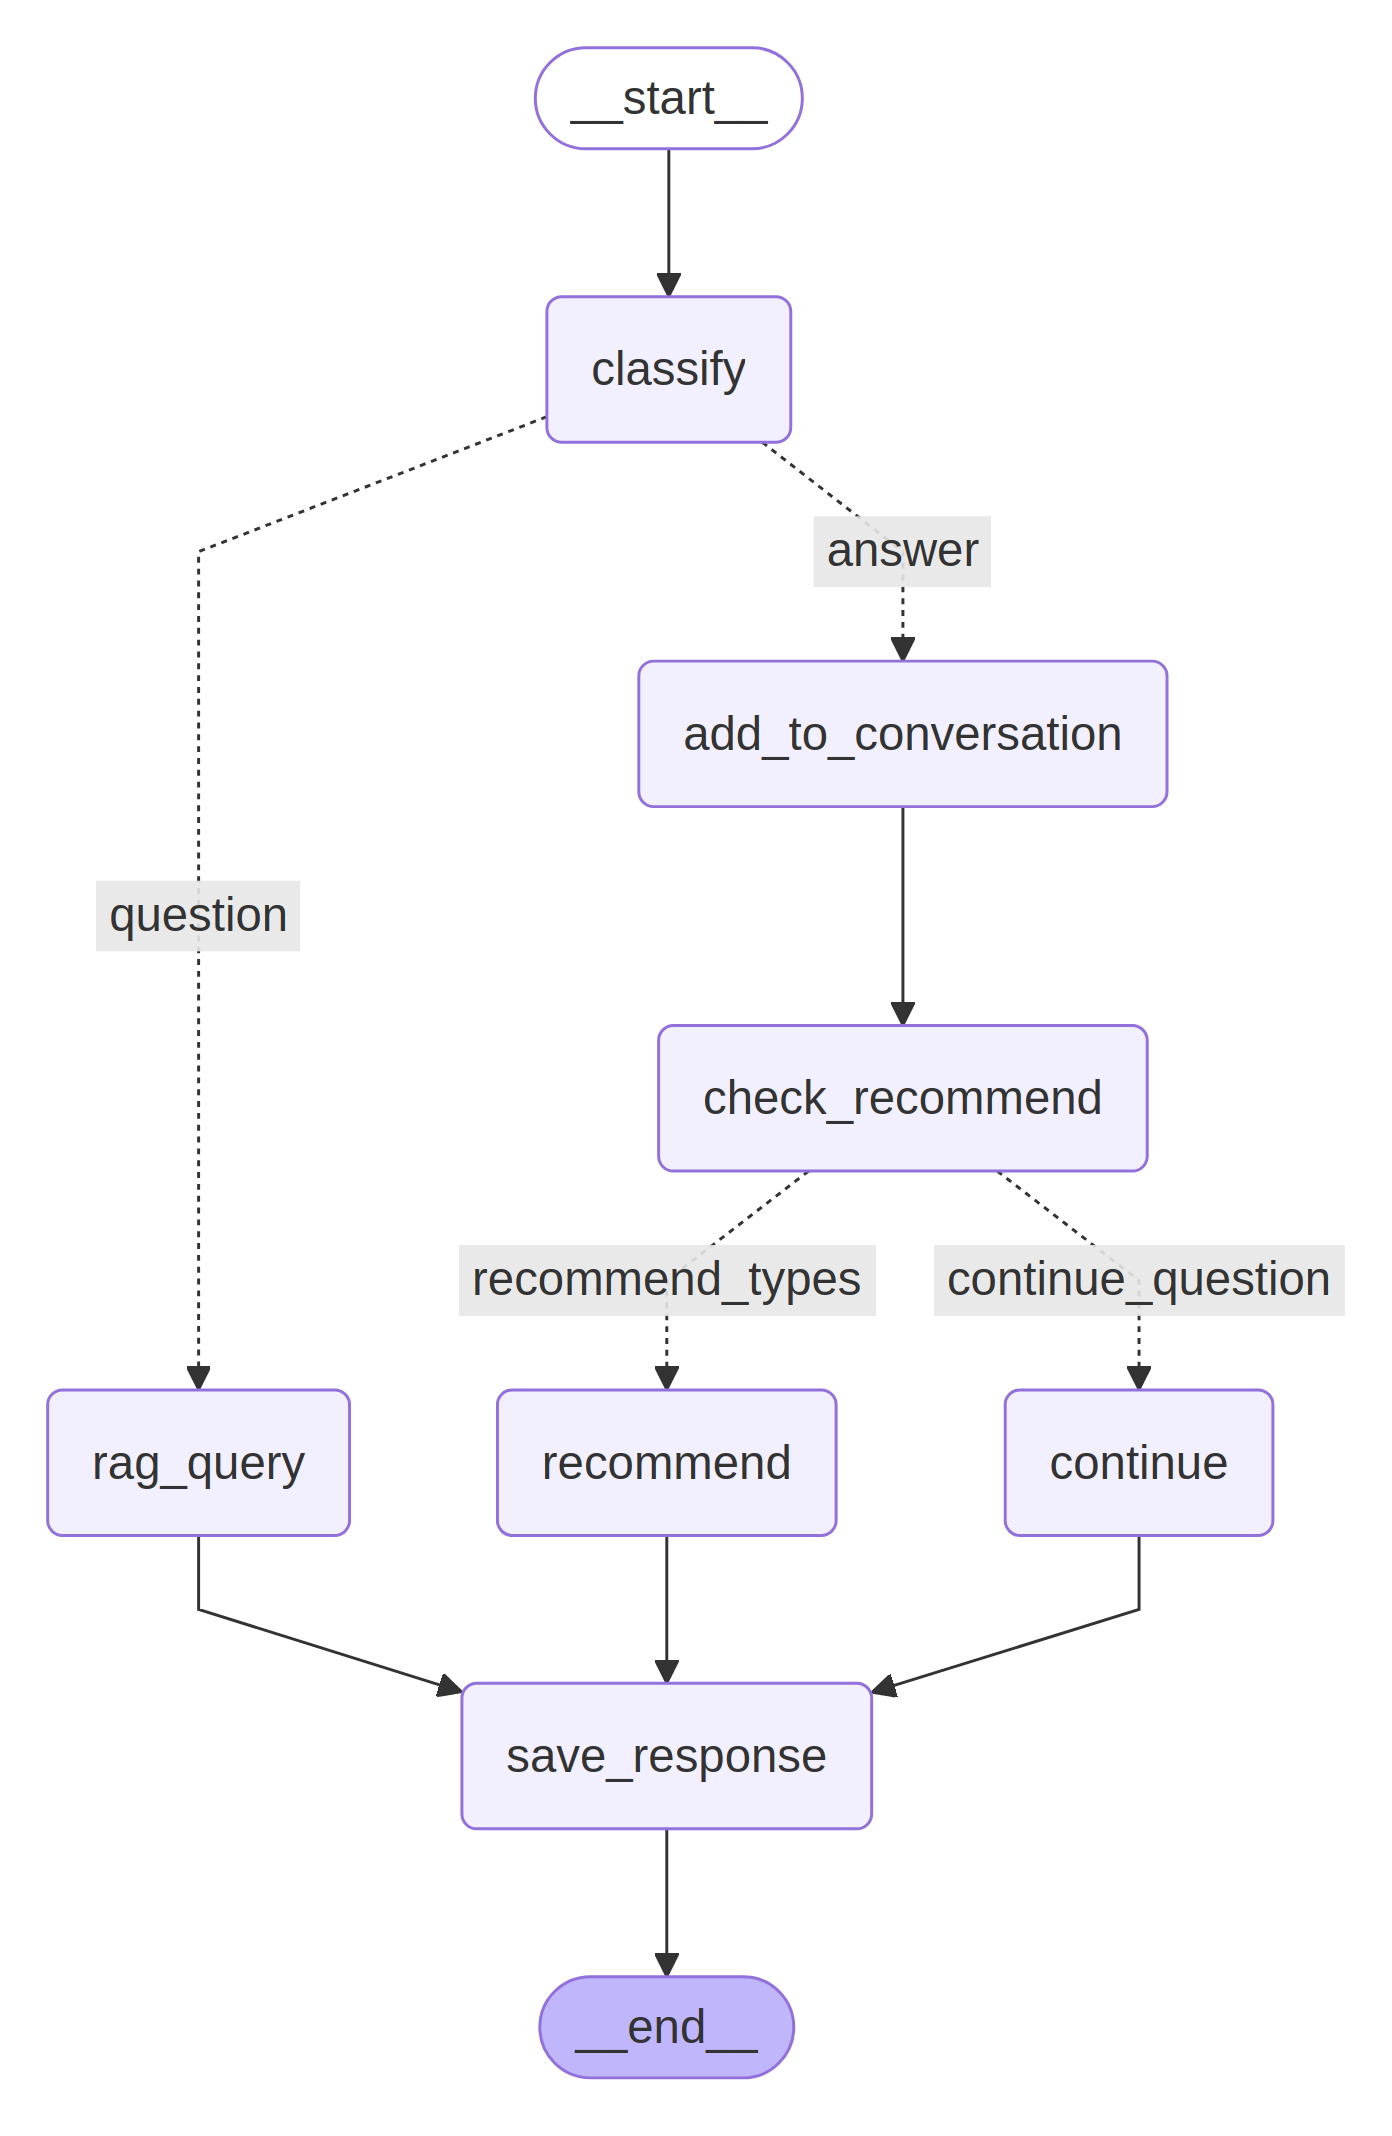

In [8]:
# Create the graph
builder = StateGraph(GraphState)

# Add nodes
builder.add_node("classify", classify_user_input)
builder.add_node("rag_query", generate_rag_response)  # This should be async
builder.add_node("add_to_conversation", add_to_conversation)
builder.add_node("check_recommend", check_trigger_conditions)
builder.add_node("recommend", generate_recommendation)
builder.add_node("continue", continue_conversation)
builder.add_node("save_response", save_response)

# Set entry point
builder.set_entry_point("classify")

# Add conditional edges
builder.add_conditional_edges(
    "classify", 
    lambda state: state["classification"]["type"] if state.get("classification") else "answer",
    {
        "question": "rag_query",
        "answer": "add_to_conversation"
    }
)

# Add regular edges
builder.add_edge("rag_query", "save_response")
builder.add_edge("add_to_conversation", "check_recommend")

# Add conditional edges for recommendation check
builder.add_conditional_edges(
    "check_recommend",
    # lambda state: check_trigger_conditions(state),
    lambda state: state.get("decision", "continue_question"),
    {
        "recommend_types": "recommend",
        "continue_question": "continue"
    }
)

builder.add_edge("recommend", "save_response")
builder.add_edge("continue", "save_response")
builder.add_edge("save_response", END)


graph = builder.compile()



display(Image(graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER),width=400))

In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.types import StreamWriter
from langchain_openai import ChatOpenAI

# Define the state structure
class State(TypedDict):
    topic: str
    joke: str

# Initialize LLM
llm = ChatOpenAI(model="gpt-4o-mini")

def refine_topic(state: State):
    """First node: refine the topic"""
    return {"topic": state["topic"] + " and cats"}

def generate_joke(state: State, writer: StreamWriter):
    """Second node: generate a joke with custom streaming"""
    # Stream custom data during processing
    writer({"status": "Starting joke generation..."})
    
    # Make LLM call
    llm_response = llm.invoke([
        {"role": "user", "content": f"Generate opposite joke about {state['topic']}"}
    ])
    
    writer({"status": "Joke generation complete!"})
    return {"joke": llm_response.content}

# Build the graph
graph = (
    StateGraph(State)
    .add_node(refine_topic)
    .add_node(generate_joke)
    .add_edge(START, "refine_topic")
    .add_edge("refine_topic", "generate_joke")
    .compile()
)

print("\n=== Streaming LLM Tokens ===")
for message_chunk, metadata in graph.stream(
    {"topic": "ice cream"}, 
    stream_mode="messages"
):
    if message_chunk.content:
        print(message_chunk.content, end="", flush=True)
print("\n")



=== Streaming LLM Tokens ===
Why did the cat refuse to eat ice cream?

Because it thought it was too "purr-fectly" cold to enjoy!



In [4]:
from typing import TypedDict, Literal, Optional

from langchain.chat_models import init_chat_model
from langgraph.graph import START, StateGraph, END
from langchain_core.messages import HumanMessage

# Initialize models
classifier_model = init_chat_model(model="openai:gpt-4o-mini", tags=["classifier"])
joke_model = init_chat_model(model="openai:gpt-4o-mini", tags=["joke"])
story_model = init_chat_model(model="openai:gpt-4o-mini", tags=["story"])

# Define output state schema
class State(TypedDict):
    topic: str
    type: Literal["joke", "story"]
    joke: Optional[str]
    story: Optional[str]

# Classifier node: parses and classifies raw input string
async def classify_input(user_input: str) -> State:
    # print("Classifying input and extracting topic...")
    response = await classifier_model.ainvoke(
        [HumanMessage(content=f"""
            The user said: "{user_input}"
            1. Classify whether this is a request for a 'joke' or a 'story'.
            2. Extract the topic.
            Reply ONLY in this JSON format: {{"type": "joke" or "story", "topic": "<topic>"}}
        """)],
    )
    
    import json
    try:
        parsed = json.loads(response.content)
        return {
            "type": parsed["type"],
            "topic": parsed["topic"],
            "joke": None,
            "story": None
        }
    except Exception as e:
        print("Failed to parse response:", response.content)
        raise e

# Joke node
async def call_joke_model(state: State) -> dict:
    print("Generating joke...")
    topic = state["topic"]
    response = await joke_model.ainvoke(
        [HumanMessage(content=f"Write a joke about {topic}")],
    )
    return {"joke": response.content}

# Story node
async def call_story_model(state: State) -> dict:
    print("Generating story...")
    topic = state["topic"]
    response = await story_model.ainvoke(
        [HumanMessage(content=f"Write a short story about {topic} in 20 words")],
    )
    return {"story": response.content}

# Router
def route_by_type(state: State):
    return "call_joke_model" if state["type"] == "joke" else "call_story_model"

# Build graph — input is just a string now!
graph = (
    StateGraph(str)  # input is just raw user string
    .add_node("classify_input", classify_input)
    .add_node("call_joke_model", call_joke_model)
    .add_node("call_story_model", call_story_model)
    .add_conditional_edges("classify_input", route_by_type)
    .add_edge(START, "classify_input")
    .add_edge("call_joke_model", END)
    .add_edge("call_story_model", END)
    .compile()
)


user_input = "tell me a story about cats"
async for msg, metadata in graph.astream(user_input, stream_mode="messages"):
    if metadata["tags"] in [["joke"], ["story"]]:
        print(msg.content, end="", flush=True)

Generating story...
In a quiet alley, three cats met nightly, sharing secrets and dreams under the moonlight, weaving friendship through whispers. 

In [ ]:
import json
from typing import TypedDict, Literal, Optional

from langchain.chat_models import init_chat_model
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langgraph.graph import START, END, StateGraph

# Initialize models
classifier_model = init_chat_model(model="openai:gpt-4o-mini", tags=["classifier"])
joke_model = init_chat_model(model="openai:gpt-4o-mini", tags=["joke"])
story_model = init_chat_model(model="openai:gpt-4o-mini", tags=["story"])

# ----------------------
# Define shared State
# ----------------------
class State(TypedDict):
    messages: list[BaseMessage]
    topic: str
    type: Literal["joke", "story"]
    joke: Optional[str]
    story: Optional[str]

# ----------------------
# Classify input type & extract topic
# ----------------------
async def classify_input(state: State) -> State:
    user_msg = state["messages"][-1]
    response = await classifier_model.ainvoke([
        HumanMessage(content=f"""
        The user said: "{user_msg.content}"
        1. Classify whether this is a request for a 'joke' or a 'story'.
        2. Extract the topic.
        Reply ONLY in this JSON format: {{"type": "joke" or "story", "topic": "<topic>"}}
        """)
    ])
    try:
        parsed = json.loads(response.content)
        return {
            **state,
            "type": parsed["type"],
            "topic": parsed["topic"],
            "joke": None,
            "story": None,
            "messages": state["messages"]
        }
    except Exception as e:
        print("Failed to parse response:", response.content)
        raise e

# ----------------------
# Generate joke
# ----------------------
async def call_joke_model(state: State) -> State:
    topic = state["topic"]
    response = await joke_model.ainvoke([
        HumanMessage(content=f"Write a joke about {topic}")
    ])
    return {
        **state,
        "joke": response.content,
        "messages": state["messages"] + [response]
    }

# ----------------------
# Generate story
# ----------------------
async def call_story_model(state: State) -> State:
    topic = state["topic"]
    response = await story_model.ainvoke([
        HumanMessage(content=f"Write a short story about {topic} in 20 words")
    ])
    return {
        **state,
        "story": response.content,
        "messages": state["messages"] + [response]
    }

# ----------------------
# Route to the correct node
# ----------------------
def route_by_type(state: State):
    return "call_joke_model" if state["type"] == "joke" else "call_story_model"

# ----------------------
# Build LangGraph pipeline
# ----------------------
graph = (
    StateGraph(State)
    .add_node("classify_input", classify_input)
    .add_node("call_joke_model", call_joke_model)
    .add_node("call_story_model", call_story_model)
    .add_conditional_edges("classify_input", route_by_type)
    .add_edge(START, "classify_input")
    .add_edge("call_joke_model", END)
    .add_edge("call_story_model", END)
    .compile()
)

# ----------------------
# Run the graph
# ----------------------
while(True):
    user_text = input("Enter : ")
    if user_text == "exit":
        break
    initial_state: State = {
        "messages": [HumanMessage(content=user_text)],
        "topic": "",
        "type": "joke",  # temporary placeholder, gets replaced
        "joke": None,
        "story": None,
    }

    # print(initial_state.get("messages"))
    async for msg, metadata in graph.astream(initial_state, stream_mode="messages"):
        if isinstance(msg, AIMessage):
            # Only print messages from joke or story models, skip classifier
            if metadata.get("name") in [["joke"], ["story"]]:
                print(msg.content, end="", flush=True)
    print(initial_state.get("messages"))
    
    print()  # Add newline after each response

DEBUG: metadata = {'langgraph_step': 1, 'langgraph_node': 'classify_input', 'langgraph_triggers': ('branch:to:classify_input',), 'langgraph_path': ('__pregel_pull', 'classify_input'), 'langgraph_checkpoint_ns': 'classify_input:62772a27-336b-3007-32e4-c3e781c2c039', 'checkpoint_ns': 'classify_input:62772a27-336b-3007-32e4-c3e781c2c039', 'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': None, 'tags': ['classifier']}
DEBUG: msg = content='' additional_kwargs={} response_metadata={} id='run--c605bb6e-351d-4f7a-abc0-44b0e802eaa2'
DEBUG: metadata = {'langgraph_step': 1, 'langgraph_node': 'classify_input', 'langgraph_triggers': ('branch:to:classify_input',), 'langgraph_path': ('__pregel_pull', 'classify_input'), 'langgraph_checkpoint_ns': 'classify_input:62772a27-336b-3007-32e4-c3e781c2c039', 'checkpoint_ns': 'classify_input:62772a27-336b-3007-32e4-c3e781c2c039', 'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat',

In [32]:
import json
from typing import TypedDict, Literal, Optional

from langchain.chat_models import init_chat_model
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langgraph.graph import START, END, StateGraph

# Initialize models
classifier_model = init_chat_model(model="openai:gpt-4o-mini")
joke_model = init_chat_model(model="openai:gpt-4o-mini")
story_model = init_chat_model(model="openai:gpt-4o-mini")

# ----------------------
# Define shared State
# ----------------------
class State(TypedDict):
    messages: list[BaseMessage]
    topic: str
    type: Literal["joke", "story"]
    joke: Optional[str]
    story: Optional[str]

# ----------------------
# Classify input type & extract topic
# ----------------------
async def classify_input(state: State) -> State:
    user_msg = state["messages"][-1]
    response = await classifier_model.ainvoke([
        HumanMessage(content=f"""
        The user said: "{user_msg.content}"
        1. Classify whether this is a request for a 'joke' or a 'story'.
        2. Extract the topic.
        Reply ONLY in this JSON format: {{"type": "joke" or "story", "topic": "<topic>"}}
        """)
    ])
    try:
        parsed = json.loads(response.content)
        return {
            **state,
            "type": parsed["type"],
            "topic": parsed["topic"],
            "joke": None,
            "story": None,
            "messages": state["messages"]  # Don't add classifier response to messages
        }
    except Exception as e:
        print("Failed to parse response:", response.content)
        raise e

# ----------------------
# Generate joke
# ----------------------
async def call_joke_model(state: State) -> State:
    topic = state["topic"]
    response = await joke_model.ainvoke([
        HumanMessage(content=f"Write a joke about {topic}")
    ])
    
    # Create AIMessage with proper formatting
    ai_message = AIMessage(content=response.content, additional_kwargs={}, response_metadata={})
    
    return {
        **state,
        "joke": response.content,
        "messages": state["messages"] + [ai_message]  # Add AI response to messages
    }

# ----------------------
# Generate story
# ----------------------
async def call_story_model(state: State) -> State:
    topic = state["topic"]
    response = await story_model.ainvoke([
        HumanMessage(content=f"Write a short story about {topic} in 20 words")
    ])
    
    # Create AIMessage with proper formatting
    ai_message = AIMessage(content=response.content, additional_kwargs={}, response_metadata={})
    
    return {
        **state,
        "story": response.content,
        "messages": state["messages"] + [ai_message]  # Add AI response to messages
    }

# ----------------------
# Route to the correct node
# ----------------------
def route_by_type(state: State):
    return "call_joke_model" if state["type"] == "joke" else "call_story_model"

# ----------------------
# Build LangGraph pipeline
# ----------------------
graph = (
    StateGraph(State)
    .add_node("classify_input", classify_input)
    .add_node("call_joke_model", call_joke_model)
    .add_node("call_story_model", call_story_model)
    .add_conditional_edges("classify_input", route_by_type)
    .add_edge(START, "classify_input")
    .add_edge("call_joke_model", END)
    .add_edge("call_story_model", END)
    .compile()
)

# ----------------------
# Run the graph
# ----------------------
conversation_messages = []  # Keep track of all messages across conversations

while(True):
    user_text = input("Enter : ")
    if user_text == "exit":
        break
    
    # Add user message to conversation history
    user_message = HumanMessage(content=user_text)
    conversation_messages.append(user_message)
    
    initial_state: State = {
        "messages": conversation_messages.copy(),  # Use conversation history
        "topic": "",
        "type": "joke",  # temporary placeholder, gets replaced
        "joke": None,
        "story": None,
    }

    print("Messages before processing:", initial_state["messages"])
    
    # Process the graph and get final state
    final_state = None
    async for msg, metadata in graph.astream(initial_state, stream_mode="messages"):
        if isinstance(msg, AIMessage):
            # Only print messages from joke or story models, skip classifier
            if metadata.get("langgraph_node") in ["call_joke_model", "call_story_model"]:
                print(msg.content, end="", flush=True)
    
    # Get the final state to update our conversation history
    final_state = await graph.ainvoke(initial_state)
    conversation_messages = final_state["messages"]  # Update conversation history
    
    # FIXED: Print the updated conversation_messages instead of initial_state
    print("\nMessages after processing:", conversation_messages)
    print()  # Add newline after each response

Messages before processing: [HumanMessage(content='tell me joke of clock', additional_kwargs={}, response_metadata={})]
Why did the clock get kicked out of school?

Because it couldn’t stop ticking off the teacher!Why did the clock get kicked out of school?

Because it couldn’t stop ticking off the teacher!
Messages after processing: [HumanMessage(content='tell me joke of clock', additional_kwargs={}, response_metadata={}, id='c88c8f16-f6f5-4a95-993a-abac757ecb12'), AIMessage(content='Why did the clock get kicked out of school?\n\nBecause it kept tocking back!', additional_kwargs={}, response_metadata={})]



In [ ]:

from dotenv import load_dotenv
from pydantic import BaseModel, Field
from openai import OpenAI

# Load environment variables
load_dotenv()

class ClassificationResult(BaseModel):
    type: str = Field(..., pattern="^(question|answer)$")
    confidence: float = Field(..., ge=0.0, le=1.0)
    reasoning: str

classifier_llm = OpenAI()
last_ai_message="how are you ?"
user_message="i am fine"
classification_prompt = f"""
        Classify this user input:

        Previous AI: "{last_ai_message}"
        User: "{user_message}"

        Is the user asking a NEW QUESTION or ANSWERING the AI's previous message?

        - "question" = User seeks information/asks something new
        - "answer" = User responds to/continues from AI's message
    """
    
response = classifier_llm.beta.chat.completions.parse(
    model="gpt-4o-mini",              
    messages=[
        {"role": "system", "content": classification_prompt},
    ],
    response_format=ClassificationResult
)


classify = response.choices[0].message.parsed

dict_classify2=classify.model_dump()

{'type': 'answer',
 'confidence': 0.95,
 'reasoning': "The user is responding to the AI's inquiry about their well-being, indicating their current state as 'fine', rather than asking a new question."}